<a href="https://www.kaggle.com/code/jaredstites/indie-comic-characters-gender-exploration?scriptVersionId=108187788" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indie-publisher-comic-characters-dataset/valiant-fandom-data.csv
/kaggle/input/indie-publisher-comic-characters-dataset/image-fandom-data.csv
/kaggle/input/indie-publisher-comic-characters-dataset/dynamite-fandom-data.csv
/kaggle/input/indie-publisher-comic-characters-dataset/dark-horse-fandom-data.csv


In [2]:
# Loading CSVs into dataframes
df_dh=pd.read_csv('../input/indie-publisher-comic-characters-dataset/dark-horse-fandom-data.csv')
df_dyna=pd.read_csv('../input/indie-publisher-comic-characters-dataset/dynamite-fandom-data.csv')
df_imge=pd.read_csv('../input/indie-publisher-comic-characters-dataset/image-fandom-data.csv')
df_vali=pd.read_csv('../input/indie-publisher-comic-characters-dataset/valiant-fandom-data.csv')


In [3]:
# Preliminary exploration
df_dh.info()
df_dyna.info()
df_imge.info()
df_vali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              145 non-null    object 
 1   Real Name         122 non-null    object 
 2   Current Alias     92 non-null     object 
 3   Aliases           52 non-null     object 
 4   Identity          97 non-null     object 
 5   Alignment         110 non-null    object 
 6   Affiliation       70 non-null     object 
 7   Relatives         40 non-null     object 
 8   Gender            135 non-null    object 
 9   Height            29 non-null     object 
 10  Weight            15 non-null     object 
 11  Eyes              53 non-null     object 
 12  Hair              90 non-null     object 
 13  Marital Status    76 non-null     object 
 14  Origin            41 non-null     object 
 15  Creators          89 non-null     object 
 16  First appearance  89 non-null     object 
 1

In [4]:
df_dyna.value_counts("Gender")

Gender
Male           147
Female          50
Agender          1
Transgender      1
dtype: int64

In [5]:
# Since this is an exploration on gender,dropping entries that do not have a gender specified
gender_dh = df_dh['Gender'].dropna()
gender_dyna = df_dyna['Gender'].dropna()
gender_imge = df_imge['Gender'].dropna()
gender_vali = df_vali['Gender'].dropna()

In [6]:
# Catagorizing a few outliers to match better established catagories for clearer analysis
gender_imge.replace('Female Android', 'Female', inplace=True)
gender_imge.replace('Genderless', 'Agender', inplace=True)
gender_imge.replace('Female/Male', 'Nonbinary', inplace=True)

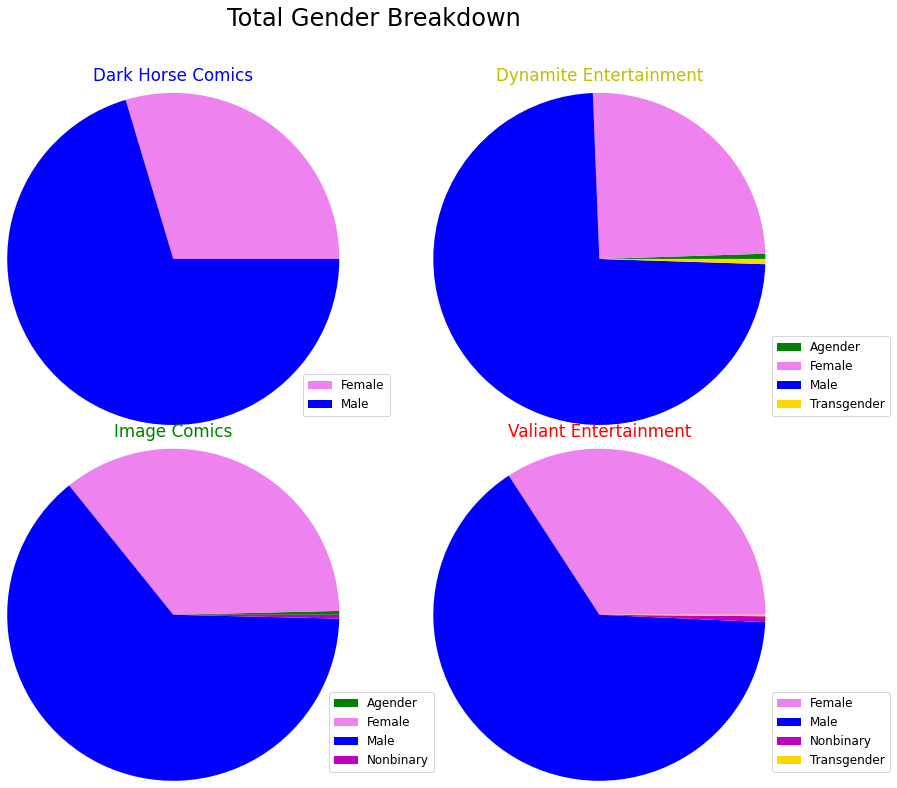

In [7]:
# Creating pie charts to compare overall gender ratios for each publisher
gender_labels_dh, gender_counts_dh = np.unique(gender_dh, return_counts=True)
gender_labels_dyna, gender_counts_dyna = np.unique(gender_dyna, return_counts=True)
gender_labels_imge, gender_counts_imge = np.unique(gender_imge, return_counts=True)
gender_labels_vali, gender_counts_vali = np.unique(gender_vali, return_counts=True)

plt.figure(figsize=(14,12))
colors = ['g', 'violet', 'b', 'y']
plt.rcParams["legend.loc"] = 'lower right'
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["legend.fancybox"] = True
plt.rcParams['font.size'] = 14
plt.rcParams["axes.titley"] = 1.08
plt.rcParams["figure.subplot.hspace"] = .25

plt.subplot(2,2,1)
plt.pie(gender_counts_dh, radius = 1.4, labels = None, colors = ['violet','b'])
plt.legend(labels = gender_labels_dh, bbox_to_anchor=(1.25, -.05))
plt.title("Dark Horse Comics",color='b')

plt.subplot(2,2,2)
plt.pie(gender_counts_dyna, radius = 1.4, labels = None, 
        colors = ['g', 'violet', 'b', 'gold'])
plt.legend(labels = gender_labels_dyna, bbox_to_anchor=(1.5, -.05))
plt.title("Dynamite Entertainment", color='y')

plt.subplot(2,2,3)
plt.pie(gender_counts_imge, radius = 1.4, labels = None,
        colors = ['g', 'violet', 'b', 'm'])
plt.legend(labels = gender_labels_imge, bbox_to_anchor=(1.4, -.05))
plt.title("Image Comics",color='g')

plt.subplot(2,2,4)
plt.pie(gender_counts_vali, radius = 1.4, labels = None, 
        colors = ['violet', 'b', 'm', 'gold'])
plt.legend(labels = gender_labels_vali, bbox_to_anchor=(1.5, -.05))
plt.title("Valiant Entertainment",color='r')

plt.suptitle("Total Gender Breakdown", ha='center', fontsize=24, y=1)

plt.show()

In [8]:
# Preprocessing data for characters per year histogram by removing characters
# with no introduction year and typecasting years to ints.
years_dyna = df_dyna["Year"].dropna()
years_dyna = list(map(int, years_dyna))

years_imge = df_imge["Year"].dropna()
years_imge = list(map(int,years_imge))

years_vali = df_vali["Year"].dropna()
years_vali = list(map(int,years_vali))

# List that contains combined publishers' character releases
years_all = years_dyna + years_imge + years_vali

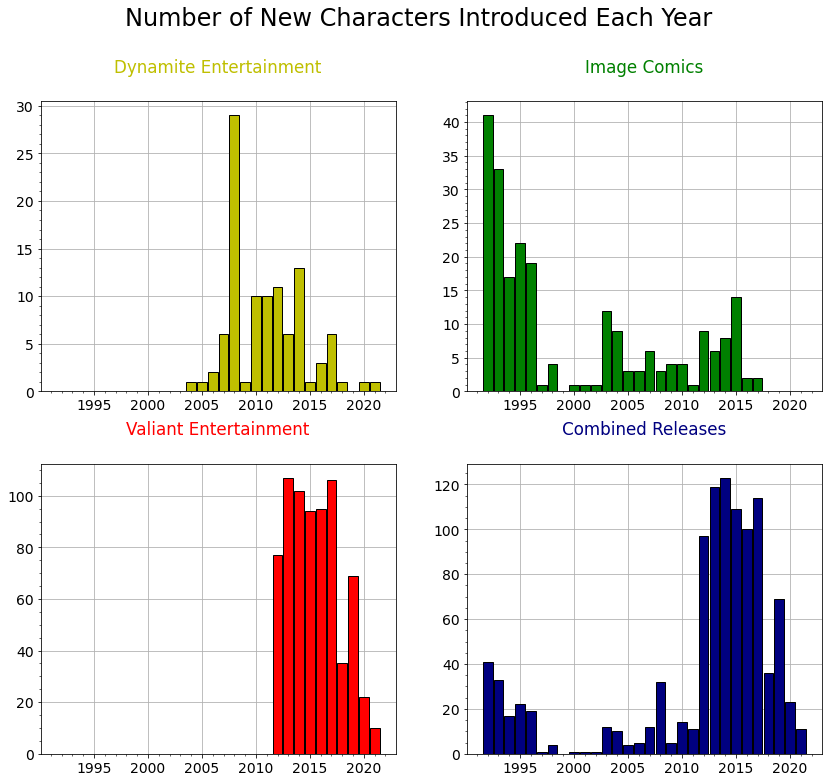

In [9]:
# Histogram that shows the number of characters introduced each year by publisher
# Then a combined histogram for all publishers
# Dark Horse was omitted since the scraped data only had 2 characters with a release year
plt.figure(figsize=(14,12))

plt.rcParams['hist.bins'] = 30
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['font.size'] = 14
plt.rcParams["figure.subplot.hspace"] = .25

plt.suptitle("Number of New Characters Introduced Each Year", ha='center', fontsize=24, y=.99)

plt.subplot(2,2,1)
plt.hist(years_dyna, range=(1992,2022), color='y',edgecolor='black', align='left', rwidth = .9)
plt.title("Dynamite Entertainment",color='y')

plt.subplot(2,2,2)
plt.hist(years_imge, range=(1992,2022), color='g',edgecolor='black', align='left', rwidth = .9)
plt.title("Image Comics",color='g')

plt.subplot(2,2,3)
plt.hist(years_vali, range=(1992,2022), color='r',edgecolor='black', align='left', rwidth = .9)
plt.title("Valiant Entertainment",color='r')

plt.subplot(2,2,4)
plt.hist(years_all, range=(1992,2022), color='navy',edgecolor='black', align='left', rwidth = .9)
plt.title("Combined Releases",color='navy')

plt.show() 

In [10]:
# Extracting year and gender columns from each publisher dataframe then combining
# extracted columns into a single dataframe
df_with_gend_and_years_dyna = df_dyna.dropna(subset=['Year','Gender'])
df_with_gend_and_years_dyna = df_with_gend_and_years_dyna.astype({'Year' : int})
df_with_gend_and_years_imge = df_imge.dropna(subset=['Year','Gender'])
df_with_gend_and_years_imge = df_with_gend_and_years_imge.astype({'Year' : int})
df_with_gend_and_years_vali = df_vali.dropna(subset=['Year','Gender'])
df_with_gend_and_years_vali = df_with_gend_and_years_vali.astype({'Year' : int})
df_with_gend_and_years_dh = df_dh.dropna(subset=['Year','Gender'])
df_with_gend_and_years_dh = df_with_gend_and_years_dh.astype({'Year' : int})

df_tmp = pd.concat([df_with_gend_and_years_dyna,
                    df_with_gend_and_years_imge,
                    df_with_gend_and_years_vali,
                    df_with_gend_and_years_dh], axis=0, ignore_index=True)

df_all = pd.DataFrame()
df_all['Year'] = df_tmp['Year']
df_all['Gender'] = df_tmp['Gender']
df_all.head()

,Year,Gender
0,2017,Male
1,2012,Male
2,2017,Female
3,2012,Female
4,2013,Male


In [11]:
# Finding the percentage of new characters introduced each year that are female
# then adding it to a list along side a list for each year.
# Only recorded data where 10 or more characters were introduced for that year
# because counting years with fewer characters felt like it skewed the data too much
# (e.g. If 2 only characters were released where one was male and one female, which 
# would calculate to 50% of all characters released that year were female and would  
# carry the same weight as a year that released 120 new characters)
df_by_year=df_all.groupby('Year')

max = df_all['Year'].max()
min = df_all['Year'].min()

new_females_per_year = []
year = []
for i in range(min,max):
    if i in df_all['Year'].unique():
        df_curr_year_group = df_by_year.get_group(i)
        total = df_curr_year_group.count().Gender
        if total < 10: #filtering out entries where there are < 10 new characters introduced
            continue
        year.append(i) 
        female_count = 0
        if 'Female' in df_curr_year_group['Gender'].unique():
            female_count = df_curr_year_group.value_counts('Gender').Female
        print('year: {}, total: {}, perc: {}'.format(i,total,female_count/total*100))
        new_females_per_year.append(female_count/total * 100)


year: 1992, total: 41, perc: 26.82926829268293
year: 1993, total: 34, perc: 35.294117647058826
year: 1994, total: 17, perc: 47.05882352941176
year: 1995, total: 21, perc: 42.857142857142854
year: 1996, total: 19, perc: 47.368421052631575
year: 2003, total: 12, perc: 33.33333333333333
year: 2004, total: 10, perc: 20.0
year: 2007, total: 12, perc: 25.0
year: 2008, total: 32, perc: 3.125
year: 2010, total: 14, perc: 14.285714285714285
year: 2011, total: 11, perc: 45.45454545454545
year: 2012, total: 97, perc: 30.927835051546392
year: 2013, total: 119, perc: 34.45378151260504
year: 2014, total: 122, perc: 22.131147540983605
year: 2015, total: 106, perc: 40.56603773584906
year: 2016, total: 97, perc: 39.175257731958766
year: 2017, total: 107, perc: 29.906542056074763
year: 2018, total: 36, perc: 38.88888888888889
year: 2019, total: 65, perc: 38.46153846153847
year: 2020, total: 23, perc: 43.47826086956522


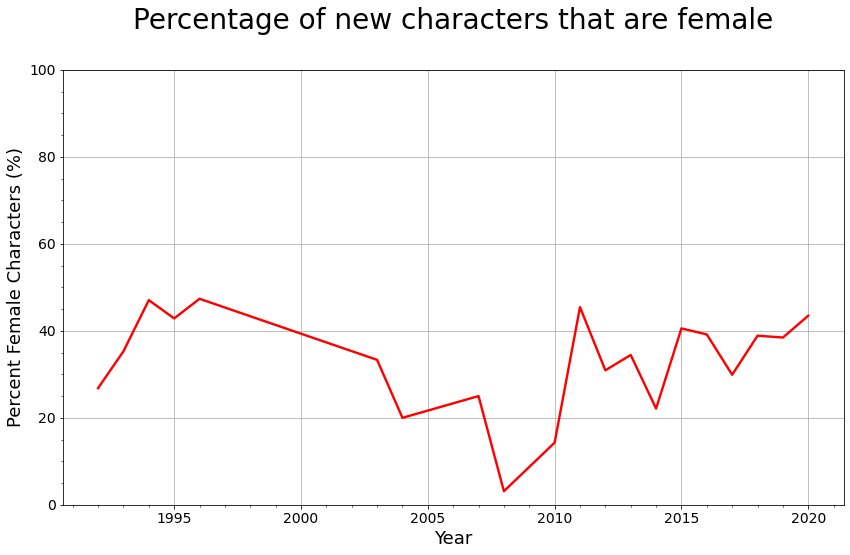

In [12]:
# Ratio of female characters release for each year as a time series graph
plt.figure(figsize=(14,8))

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

plt.plot(year, new_females_per_year, color='r', linewidth=2.4)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Percent Female Characters (%)', fontsize=18)
plt.ylim(0,100)

plt.title('Percentage of new characters that are female', fontsize=28)

plt.show()


In [13]:
# Determining the overall ratio of female characters (i.e. new releases + current count) 
# as a function of time.
total_females_introduced = []
year = []
female_count = 0
total = 0
for i in range(min+2,max): #Filtering out first two years because counts were very low
    if i in df_all['Year'].unique():
        df_curr_year_group = df_by_year.get_group(i)
        total += df_curr_year_group.count().Gender
        year.append(i)    
        if 'Female' in df_curr_year_group['Gender'].unique():
            new_female_count = df_curr_year_group.value_counts('Gender').Female
            female_count += new_female_count
        print('year: {}, total: {}, perc: {}'.format(i,total,female_count/total*100))
        total_females_introduced.append(female_count/total * 100)

year: 1993, total: 34, perc: 35.294117647058826
year: 1994, total: 51, perc: 39.21568627450981
year: 1995, total: 72, perc: 40.27777777777778
year: 1996, total: 91, perc: 41.75824175824176
year: 1997, total: 92, perc: 41.30434782608695
year: 1998, total: 96, perc: 39.58333333333333
year: 2000, total: 97, perc: 39.175257731958766
year: 2001, total: 98, perc: 38.775510204081634
year: 2002, total: 99, perc: 38.38383838383838
year: 2003, total: 111, perc: 37.83783783783784
year: 2004, total: 121, perc: 36.36363636363637
year: 2005, total: 125, perc: 36.8
year: 2006, total: 130, perc: 36.15384615384615
year: 2007, total: 142, perc: 35.2112676056338
year: 2008, total: 174, perc: 29.310344827586203
year: 2009, total: 179, perc: 28.49162011173184
year: 2010, total: 193, perc: 27.461139896373055
year: 2011, total: 204, perc: 28.431372549019606
year: 2012, total: 301, perc: 29.2358803986711
year: 2013, total: 420, perc: 30.714285714285715
year: 2014, total: 542, perc: 28.782287822878228
year: 20

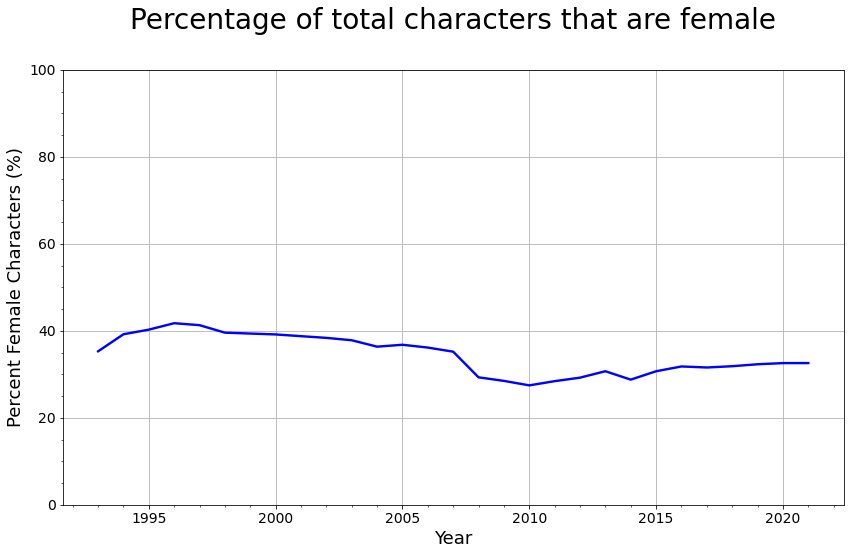

In [14]:
# Time series of cumulative ratio of female characters as a percentage of all characters
plt.figure(figsize=(14,8))

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

plt.plot(year, total_females_introduced, color='b', linewidth=2.4)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Percent Female Characters (%)', fontsize=18)
plt.ylim(0,100)

plt.title('Percentage of total characters that are female', fontsize=28)

plt.show()